In [2]:
%ls

analysis/                      examples/             SaProt_650M_AF2.pt
best_models/                   LICENSE               test.ipynb
biosnap_protein_after_agg.pkl  pyproject.toml        tests.py
checkpoints/                   README.md             ultrafast/
CITATION.cff                   run_biosnap.sh        ultrafast.egg-info/
configs/                       run_davis_pseudo.sh*  utils/
data/                          run_davis.sh*         wandb/


torch.Size([5497])
torch.Size([5497])


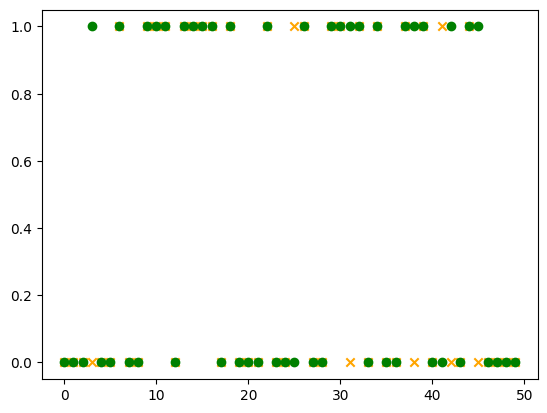

In [22]:
import pickle
import matplotlib.pyplot as plt
import torch
# Load the pickle file
with open('analysis/biosnap_test_outputs.pkl', 'rb') as f:
    test_step_outputs = pickle.load(f)
with open('analysis/biosnap_test_targets.pkl', 'rb') as f:
    test_step_target = pickle.load(f)
# Print or inspect the loaded data
print(test_step_outputs.shape)
print(test_step_target.shape)
threshold = 0.5
test_step_outputs = (test_step_outputs >= threshold).float()
x = 800
test_step_outputs1 = test_step_outputs[x:x+50]
test_step_target1 = test_step_target[x:x+50]
plt.scatter(range(len(test_step_outputs1)),test_step_outputs1, color='orange', label="Predict", marker='x')
plt.scatter(range(len(test_step_target1)),test_step_target1, color='green', label="Correct", marker='o')

In [23]:
len(test_step_target[test_step_target == 1])

2770

In [24]:
print("Number of true positives:", torch.sum(test_step_outputs * test_step_target))
print("Number of true negatives:", torch.sum((1 - test_step_outputs) * (1 - test_step_target)))
print("Number of false positives:", torch.sum(test_step_outputs * (1 - test_step_target)))
print("Number of false negatives:", torch.sum((1 - test_step_outputs) * test_step_target))

Number of true positives: tensor(2191.)
Number of true negatives: tensor(2516.)
Number of false positives: tensor(211.)
Number of false negatives: tensor(579.)


In [25]:
print("Label positive: ", torch.sum(test_step_target), ', Label negative: ', torch.sum(1 - test_step_target))

Label positive:  tensor(2770.) , Label negative:  tensor(2727.)


In [26]:
from sklearn.metrics import f1_score
f1 = f1_score(test_step_target, test_step_outputs)
print("F1-score:", f1)

F1-score: 0.8472544470224285


torch.Size([5497])
torch.Size([5497])


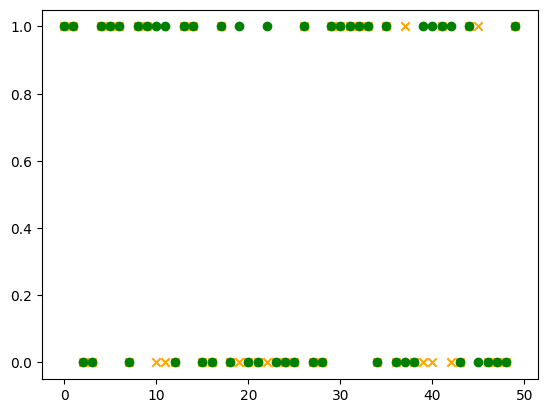

In [27]:
import pickle
import matplotlib.pyplot as plt
# Load the pickle file
with open('analysis/biosnap_test_outputs.pkl', 'rb') as f:
    test_step_outputs = pickle.load(f)
with open('analysis/biosnap_test_targets.pkl', 'rb') as f:
    test_step_target = pickle.load(f)
# Print or inspect the loaded data
print(test_step_outputs.shape)
print(test_step_target.shape)
threshold = 0.45
test_step_outputs = (test_step_outputs >= threshold).float()
x = 1900
test_step_outputs1 = test_step_outputs[x:x+50]
test_step_target1 = test_step_target[x:x+50]
plt.scatter(range(len(test_step_outputs1)),test_step_outputs1, color='orange', label="Predict", marker='x')
plt.scatter(range(len(test_step_target1)),test_step_target1, color='green', label="Correct", marker='o')

In [28]:
print("Number of true positives:", torch.sum(test_step_outputs * test_step_target))
print("Number of true negatives:", torch.sum((1 - test_step_outputs) * (1 - test_step_target)))
print("Number of false positives:", torch.sum(test_step_outputs * (1 - test_step_target)))
print("Number of false negatives:", torch.sum((1 - test_step_outputs) * test_step_target))

Number of true positives: tensor(2269.)
Number of true negatives: tensor(2433.)
Number of false positives: tensor(294.)
Number of false negatives: tensor(501.)


In [29]:
print("Label positive: ", torch.sum(test_step_target), ', Label negative: ', torch.sum(1 - test_step_target))

Label positive:  tensor(2770.) , Label negative:  tensor(2727.)


In [30]:
from sklearn.metrics import f1_score
f1 = f1_score(test_step_target, test_step_outputs)
print("F1-score:", f1)

F1-score: 0.8509281830114382


In [31]:
import pickle
with open("analysis/biosnap_drug_before.pkl", "rb") as f:  # Mở file ở chế độ đọc nhị phân
    biosnap_drug_before = pickle.load(f)  # Giải nén dữ liệu từ file
with open("analysis/biosnap_drug_after.pkl", "rb") as f:  # Mở file ở chế độ đọc nhị phân
    biosnap_drug_after = pickle.load(f)  # Giải nén dữ liệu từ file

with open("analysis/biosnap_protein_after.pkl", "rb") as f:  # Mở file ở chế độ đọc nhị phân
    biosnap_protein_after = pickle.load(f)  # Giải nén dữ liệu từ file

with open("analysis/biosnap_protein_after_agg.pkl", "rb") as f:  # Mở file ở chế độ đọc nhị phân
    biosnap_protein_after_agg = pickle.load(f)  # Giải nén dữ liệu từ file
biosnap_protein_after_agg = np.concatenate(biosnap_protein_after_agg)

In [32]:
import pandas as pd
train_df = pd.read_csv('data/BIOSNAP/full_data/train.csv')
val_df = pd.read_csv('data/BIOSNAP/full_data/val.csv')
combined_df = pd.concat([train_df, val_df], ignore_index=True)
test_df = pd.read_csv('data/BIOSNAP/full_data/test.csv')

In [33]:
combined_df.duplicated(subset=['SMILES', 'Target Sequence'], keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
21981    False
21982    False
21983    False
21984    False
21985    False
Length: 21986, dtype: bool

In [34]:
drug_smile  = set(combined_df['SMILES'])
protein_seq = set(combined_df['Target Sequence'])
label       = set(combined_df['Label'])
print(len(drug_smile))
print(len(protein_seq))
print(len(label))

4459
2179
2


In [35]:
drug_smile  = list(test_df['SMILES'])
protein_seq = list(test_df['Target Sequence'])
label       = list(test_df['Label'])

In [36]:
print(len(set(drug_smile)))
print(len(set(protein_seq)))

2962
1811


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle
with open("analysis/biosnap_drug_before.pkl", "rb") as f:  # Mở file ở chế độ đọc nhị phân
    biosnap_drug_before = pickle.load(f)  # Giải nén dữ liệu từ file
with open("analysis/biosnap_drug_after.pkl", "rb") as f:  # Mở file ở chế độ đọc nhị phân
    biosnap_drug_after = pickle.load(f)  # Giải nén dữ liệu từ file

with open("analysis/biosnap_protein_after.pkl", "rb") as f:  # Mở file ở chế độ đọc nhị phân
    biosnap_protein_after = pickle.load(f)  # Giải nén dữ liệu từ file

with open("analysis/biosnap_protein_after_agg.pkl", "rb") as f:  # Mở file ở chế độ đọc nhị phân
    biosnap_protein_after_agg = pickle.load(f)  # Giải nén dữ liệu từ file
biosnap_protein_after_agg = np.concatenate(biosnap_protein_after_agg).squeeze(axis = 1)
# Apply t-SNE to drug features
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result1 = tsne.fit_transform(biosnap_drug_before)

# Apply t-SNE to protein features
tsne2 = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result2 = tsne2.fit_transform(biosnap_protein_after_agg)

# Combine t-SNE results
tsne_result = np.concatenate([tsne_result1, tsne_result2], axis=0)
# Create category identifiers
categories = np.concatenate([np.zeros(len(tsne_result1)), np.ones(len(tsne_result2))])  # 0 for drug, 1 for protein


In [38]:
print('analysis/biosnap_drug_before:\t\t'    ,biosnap_drug_before.shape)
print('analysis/biosnap_protein_after_agg:\t',biosnap_protein_after_agg.shape)
print('analysis/biosnap_protein_after:\t\t'  ,biosnap_protein_after.shape)
print('analysis/biosnap_drug_after:\t\t'     ,biosnap_drug_after.shape)

analysis/biosnap_drug_before:		 (5497, 768)
analysis/biosnap_protein_after_agg:	 (5497, 1280)
analysis/biosnap_protein_after:		 (5497, 1024)
analysis/biosnap_drug_after:		 (5497, 1024)


In [39]:
print('Label:\t\t\t\t',                   len(label))
print('analysis/biosnap_drug_before:\t\t',           biosnap_drug_before.shape)
print('analysis/biosnap_protein_after_agg:\t',       biosnap_protein_after_agg.shape)
print('analysis/biosnap_protein_after:\t\t'  ,biosnap_protein_after.shape)
print('analysis/biosnap_drug_after:\t\t'     ,biosnap_drug_after.shape)

Label:				 5497
analysis/biosnap_drug_before:		 (5497, 768)
analysis/biosnap_protein_after_agg:	 (5497, 1280)
analysis/biosnap_protein_after:		 (5497, 1024)
analysis/biosnap_drug_after:		 (5497, 1024)


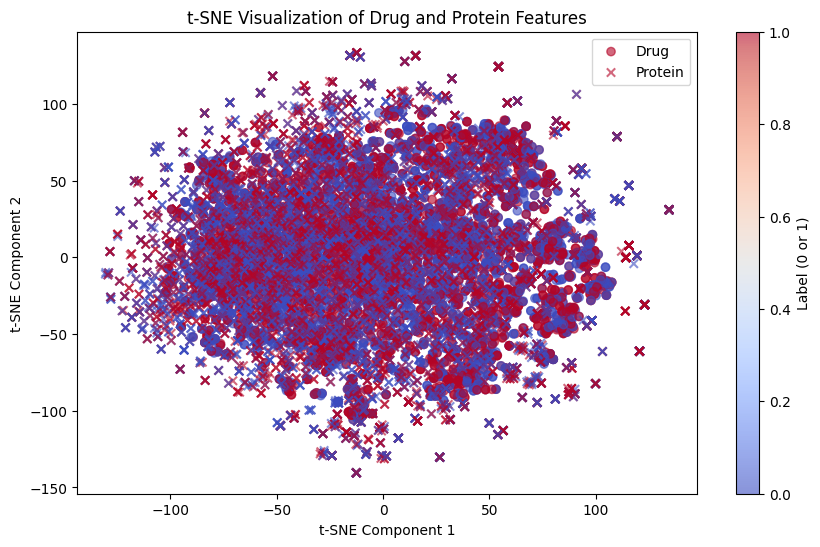

In [40]:
# Plot
plt.figure(figsize=(10, 6))

# Scatter plot for drugs
scatter_drug = plt.scatter(
    tsne_result[categories == 0, 0], tsne_result[categories == 0, 1], 
    c=label, cmap='coolwarm', marker='o', alpha=0.6, label="Drug"
)

# # Scatter plot for proteins
scatter_protein = plt.scatter(
    tsne_result[categories == 1, 0], tsne_result[categories == 1, 1], 
    c=label, cmap='coolwarm', marker='x', alpha=0.6, label="Protein"
)

plt.colorbar(scatter_drug, label="Label (0 or 1)")
plt.legend()
plt.title("t-SNE Visualization of Drug and Protein Features")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

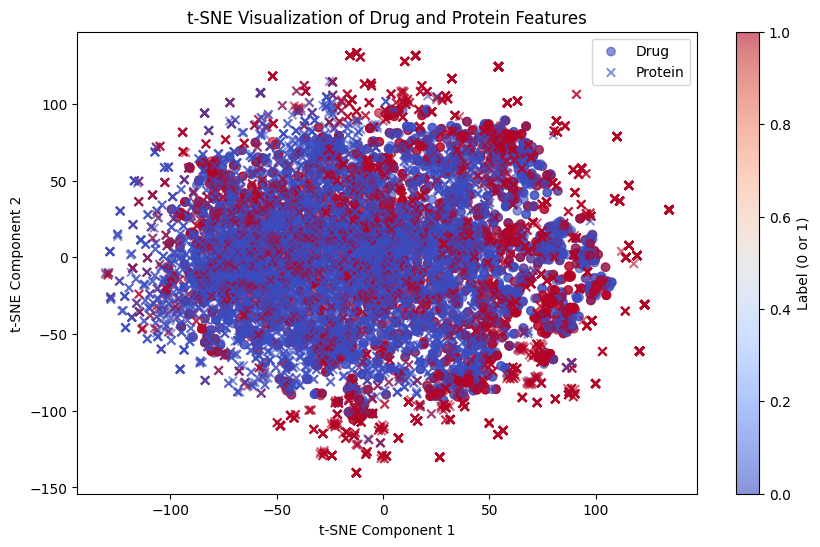

In [41]:

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot for drugs
scatter_drug = plt.scatter(
    tsne_result[categories == 0, 0], tsne_result[categories == 0, 1], 
    c=test_step_outputs, cmap='coolwarm', marker='o', alpha=0.6, label="Drug"
)

# # Scatter plot for proteins
scatter_protein = plt.scatter(
    tsne_result[categories == 1, 0], tsne_result[categories == 1, 1], 
    c=test_step_outputs, cmap='coolwarm', marker='x', alpha=0.6, label="Protein"
)

plt.colorbar(scatter_drug, label="Label (0 or 1)")
plt.legend()
plt.title("t-SNE Visualization of Drug and Protein Features")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [42]:
import pandas as pd
test_df = pd.read_csv('data/DAVIS/test.csv')
drug_smile  = list(test_df['SMILES'])
protein_seq = list(test_df['Target Sequence'])
label       = list(test_df['Label'])

In [43]:
unique_proteins = {seq: f'P{i+1}' for i, seq in enumerate(test_df['Target Sequence'].unique())} 
map_protein = test_df['Target Sequence'].map(unique_proteins)
unique_drugs = {seq: f'P{i+1}' for i, seq in enumerate(test_df['SMILES'].unique())} 
map_drug = test_df['SMILES'].map(unique_drugs)

In [44]:
print(len(set(unique_drugs)))
print(len(set(unique_proteins)))

68
379


<Figure size 1000x500 with 0 Axes>

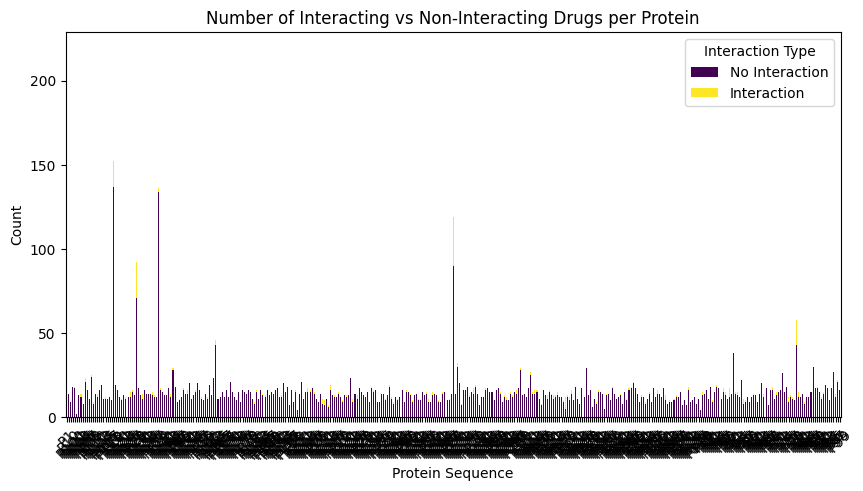

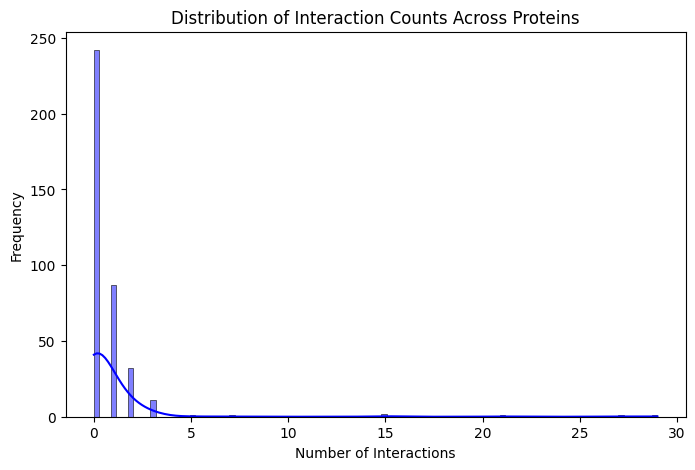

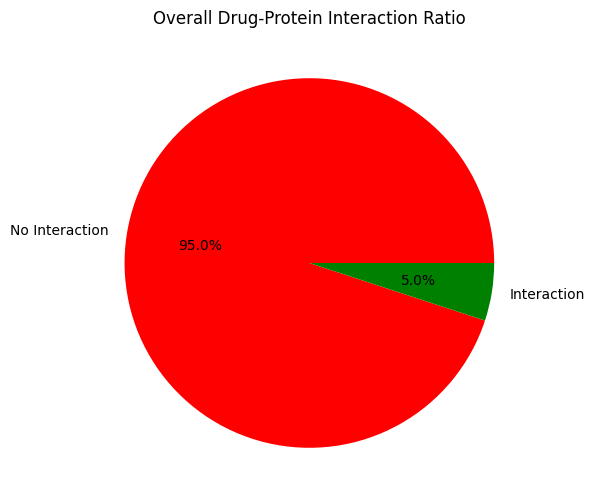

       No Interaction  Interaction
count      379.000000   379.000000
mean        15.060686     0.799472
std         14.341600     2.626060
min          2.000000     0.000000
25%         11.000000     0.000000
50%         13.000000     0.000000
75%         16.000000     1.000000
max        191.000000    29.000000


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (replace this with your actual test_df)
# test_df = pd.read_csv('your_data.csv')

# Example Data (Replace with actual test_df)
test_df = pd.DataFrame({
    'SMILES': list(map_drug),
    'Target Sequence': list(map_protein),
    'Label': label # 1 = Interaction, 0 = No Interaction
})

# Count interactions per protein
interaction_counts = test_df.groupby('Target Sequence')['Label'].value_counts().unstack(fill_value=0)
interaction_counts.columns = ['No Interaction', 'Interaction']

# Bar Chart: Number of Interacting vs Non-Interacting Drugs per Protein
plt.figure(figsize=(10, 5))
interaction_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 5))
plt.title('Number of Interacting vs Non-Interacting Drugs per Protein')
plt.xlabel('Protein Sequence')
plt.ylabel('Count')
plt.legend(title='Interaction Type')
plt.xticks(rotation=45)
plt.show()

# Histogram: Distribution of Interaction Counts Across Proteins
plt.figure(figsize=(8, 5))
sns.histplot(interaction_counts['Interaction'], bins=100, kde=True, color='blue')
plt.title('Distribution of Interaction Counts Across Proteins')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

# Pie Chart: Overall Interaction Ratio
total_counts = test_df['Label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(total_counts, labels=['No Interaction', 'Interaction'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Overall Drug-Protein Interaction Ratio')
plt.show()

# Summary Statistics
print(interaction_counts.describe())


In [46]:
len(test_df['Target Sequence'])

6011

In [37]:
import numpy as np
import h5py
import tqdm
import pickle as pkl
import torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
drug = pkl.load(open('analysis/davis_drug_before.pkl','rb'))
target = pkl.load(open('analysis/davis_protein_after_agg.pkl','rb'))
drug_projection = pkl.load(open('analysis/davis_drug_after.pkl','rb'))
target_projection = pkl.load(open('analysis/davis_protein_after.pkl','rb'))
pred = pkl.load(open('analysis/davis_test_outputs.pkl','rb'))  
label = pkl.load(open('analysis/davis_test_targets.pkl','rb'))  
target = np.concatenate(target).squeeze(1) 

In [38]:
def analysis_pred_label(pred, label, threshold, start_point):
    pred = (pred >= threshold).float()
    pred = pred.detach().cpu().numpy()
    label = label.detach().cpu().numpy()
    pred1 = pred[start_point:start_point+50]
    label1 = label[start_point:start_point+50]
    plt.scatter(range(len(pred1)),pred1, color='orange', label="Predict", marker='x')
    plt.scatter(range(len(label1)),label1, color='green', label="Correct", marker='o')

def tsne_drug_protein(drug, protein, label, name_plot, alpha_value = 0.3):
    if isinstance(drug, torch.Tensor):
        drug = drug.detach().cpu().numpy()

    if isinstance(protein, torch.Tensor):
        protein = protein.detach().cpu().numpy()
    label = label.detach().cpu().numpy()
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    tsne_result1 = tsne.fit_transform(drug)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    tsne_result2 = tsne.fit_transform(protein)
    tsne_result = np.concatenate([tsne_result1, tsne_result2], axis=0)
    categories = np.concatenate([np.zeros(len(tsne_result1)), np.ones(len(tsne_result2))])
    plt.figure(figsize=(10, 6))
    # Scatter plot for drugs
    scatter_drug = plt.scatter(
        tsne_result[categories == 0, 0], tsne_result[categories == 0, 1], 
        c=label, cmap='coolwarm', marker='o', alpha=alpha_value, label="Drug"
    )

    # # Scatter plot for proteins
    scatter_protein = plt.scatter(
        tsne_result[categories == 1, 0], tsne_result[categories == 1, 1], 
        c=label, cmap='coolwarm', marker='x', alpha=alpha_value, label="Protein"
    )

    plt.colorbar(scatter_drug, label="Label (0 or 1)")
    plt.legend()
    plt.title(name_plot)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()

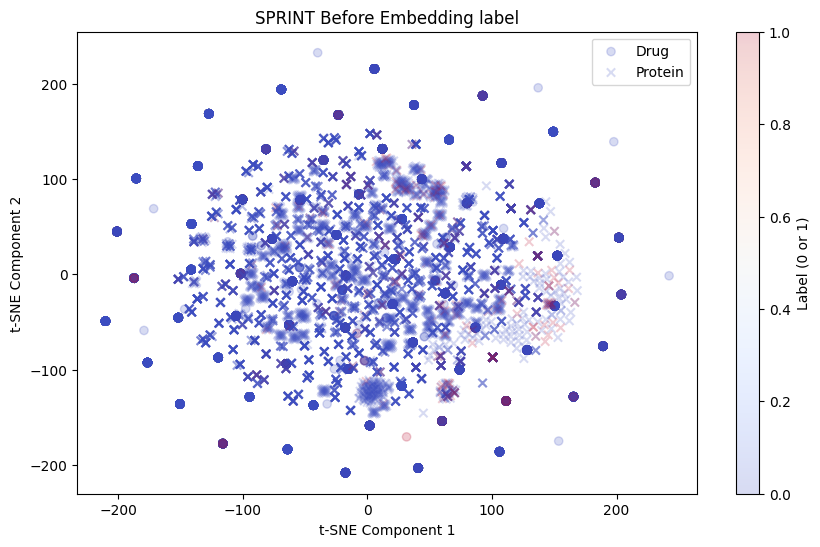

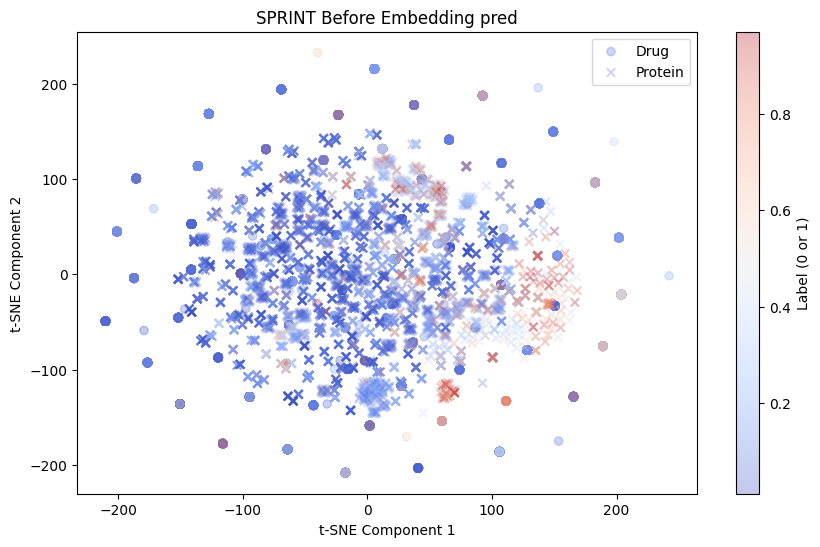

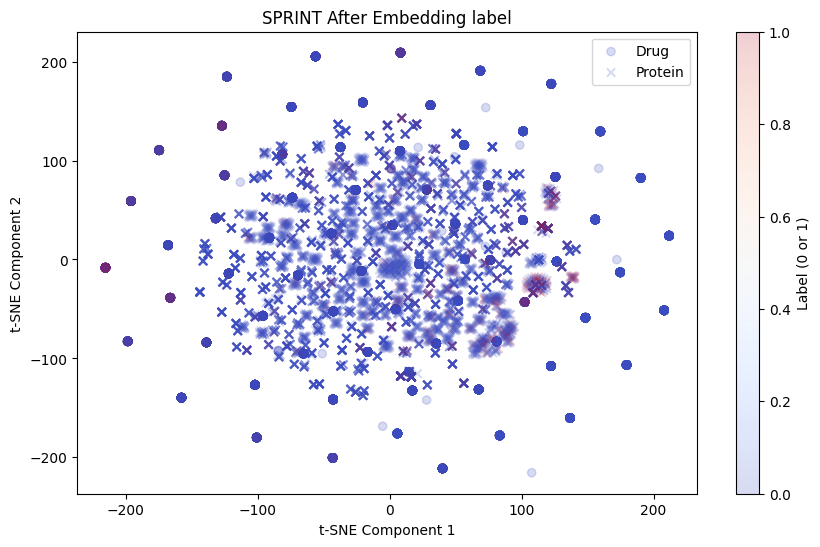

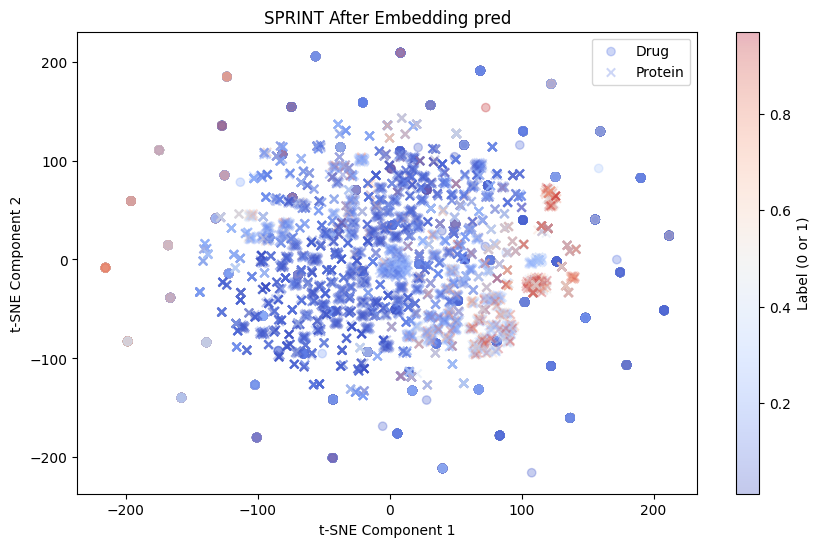

In [39]:
tsne_drug_protein(drug, target, label, name_plot = 'SPRINT Before Embedding label', alpha_value = 0.2)
tsne_drug_protein(drug, target, pred, name_plot = 'SPRINT Before Embedding pred')


tsne_drug_protein(drug_projection, target_projection, label, name_plot = 'SPRINT After Embedding label', alpha_value = 0.2)
tsne_drug_protein(drug_projection, target_projection, pred, name_plot = 'SPRINT After Embedding pred')

In [41]:
pred = (pred >= 0.5).float()
print("Number of true positives:", torch.sum(pred * label))
print("Number of true negatives:", torch.sum((1 - pred) * (1 - label)))
print("Number of false positives:", torch.sum(pred * (1 - label)))
print("Number of false negatives:", torch.sum((1 - pred) * label))

Number of true positives: tensor(238.)
Number of true negatives: tensor(5118.)
Number of false positives: tensor(590.)
Number of false negatives: tensor(65.)
